# Diagonalization of XZX model for systems of relative low size
This notebook checks if the ground state is degenerate for OBC and non-degenerate for PBC. It also calculates how the time scale with the size of the system for full matrix, sparse matrix and sparse block matrix.

In [1]:
import functions
import functions_fast as fast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import block_diag
from numpy.linalg import eigh,eigvalsh
from scipy.sparse.linalg import eigsh
import time

## Simple exemples

#### Eigenvectors for different k subpaces

In [2]:
L = 10

In [4]:
eigs_k = []

for k in range(L):
    h = fast.build_HK(L, k, 0, 1)
    eigenvalues, _ = eigh(h)
    eigs_k.append((eigenvalues))

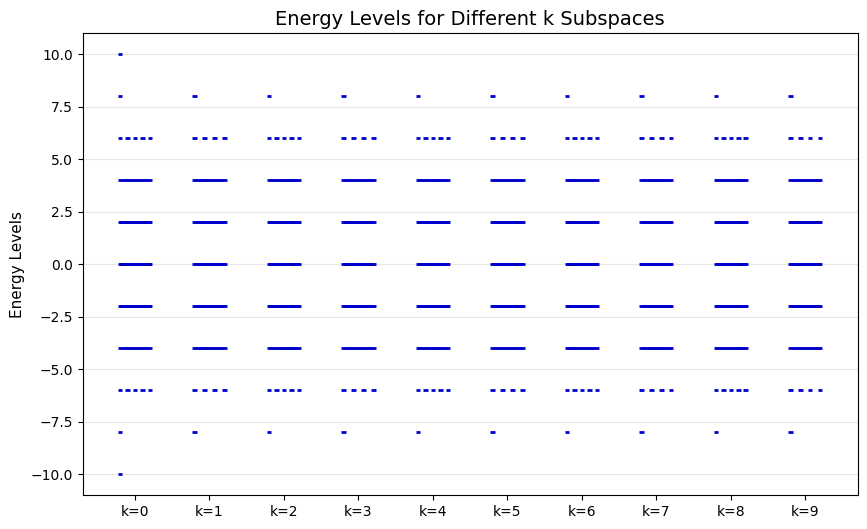

In [5]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for j, energies in enumerate(eigs_k):

    energy_levels, degeneracies = np.unique(np.round(energies, 8), return_counts=True)
    
    for i, (energy, degeneracy) in enumerate(zip(energy_levels, degeneracies)):
        x_positions = np.linspace(-0.2+j, 0.2+j, degeneracy)
        for x in x_positions:
            ax.hlines(energy, xmin=x-0.03, xmax=x+0.03, color='mediumblue', linewidth=2)

# Customizing the plot
ax.set_ylabel("Energy Levels", fontsize=11)
ax.set_xticks(np.arange(L),["k="+str(i) for i in range(L)])  
#ax.set_ylim(-L-1, L + 1) 
ax.grid(alpha=0.3,axis='y')  

# Display the plot
plt.title("Energy Levels for Different k Subspaces", fontsize=14)
plt.show()


### PBC

In [81]:
J = [0, 0.1, 0.2, 0.5, 5, 10]

#### L = 10

In [85]:
L = 10

In [86]:
eigen = []

for j in J:
    h = functions.build_fullH(L,pbc=True,J=j)
    eigen.append(eigvalsh(h))

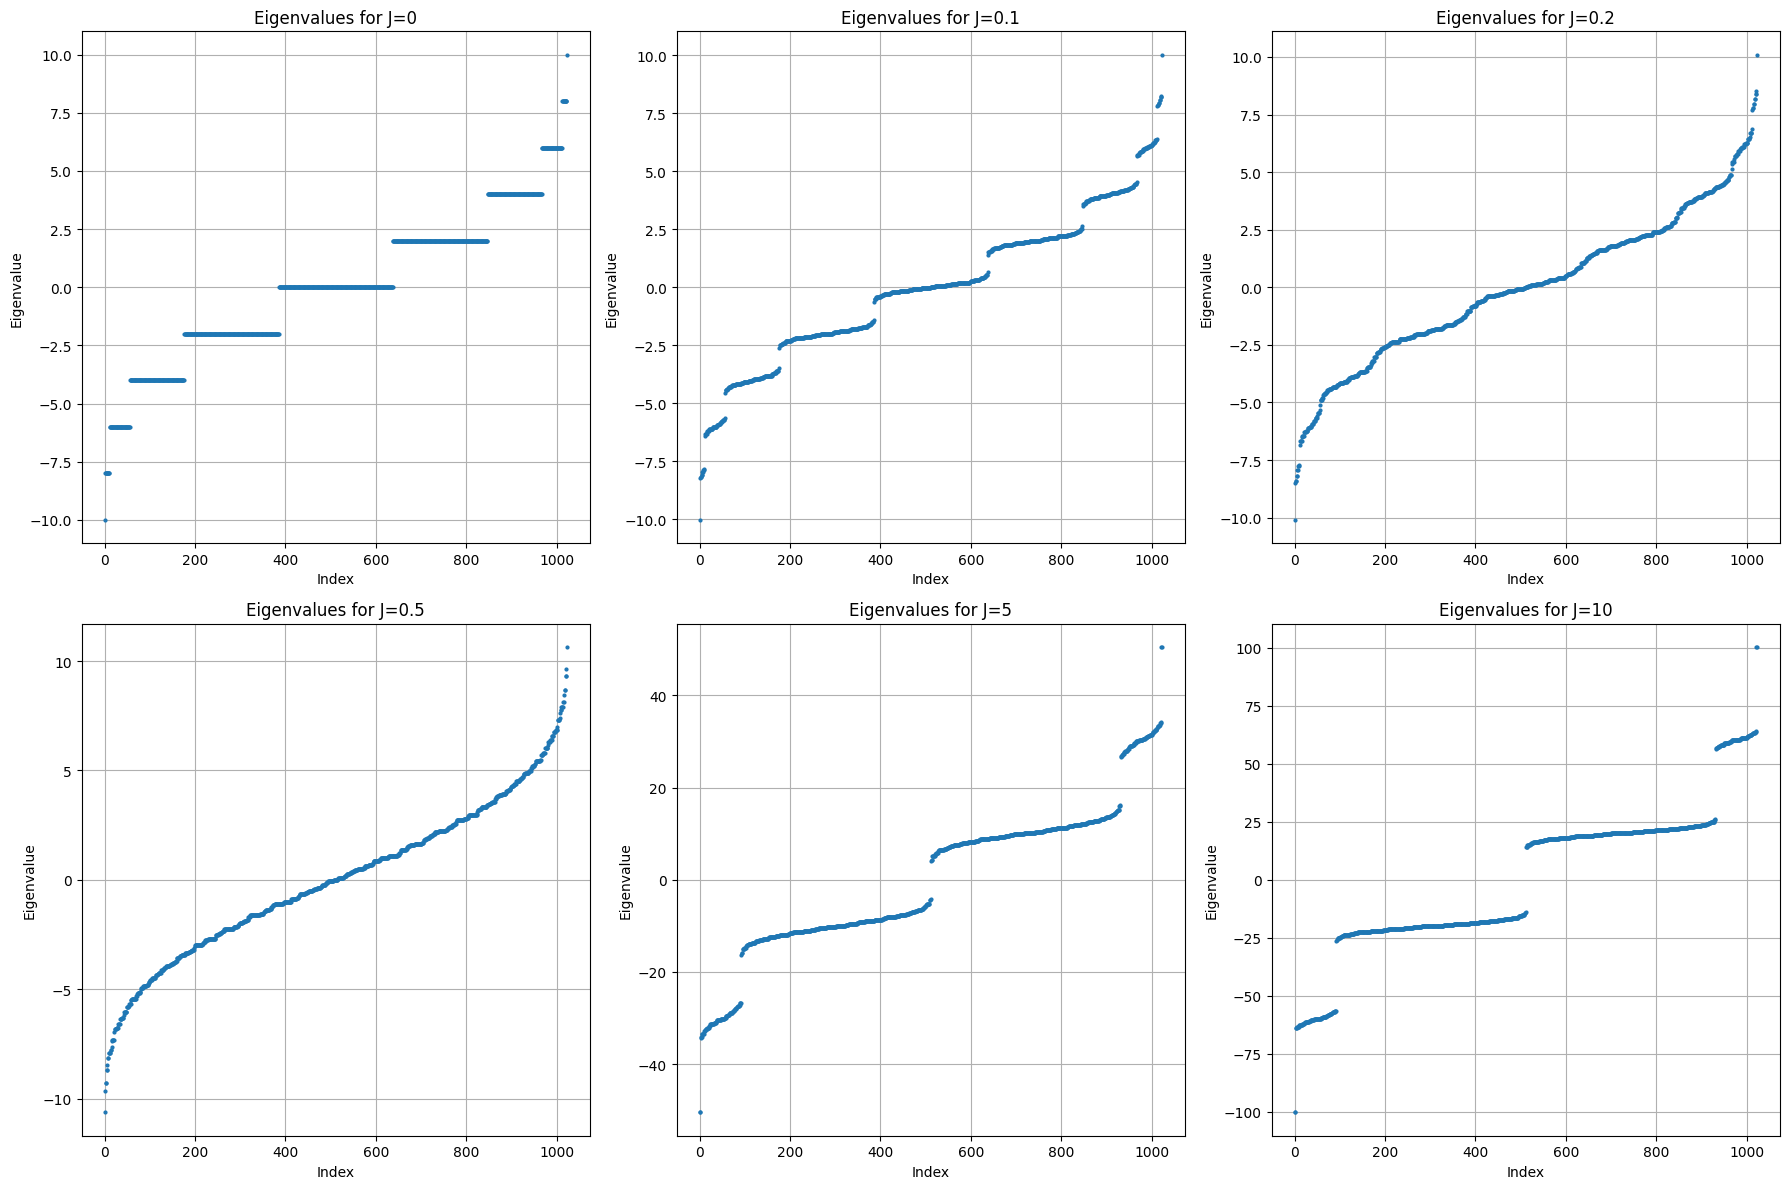

In [87]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each set of eigenvalues in a separate subplot
for i, ax in enumerate(axs):
    if i < len(eigen):
        ax.plot(eigen[i], 'o', markersize=2)
        ax.set_title(f'Eigenvalues for J={J[i]}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Eigenvalue')
        ax.grid(True)
    else:
        fig.delaxes(ax)  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

#### L = 9

In [22]:
L = 9

In [23]:
eigen = []

for j in J:
    h = functions.build_fullH(L,pbc=True,J=j)
    eigen.append(eigvalsh(h))

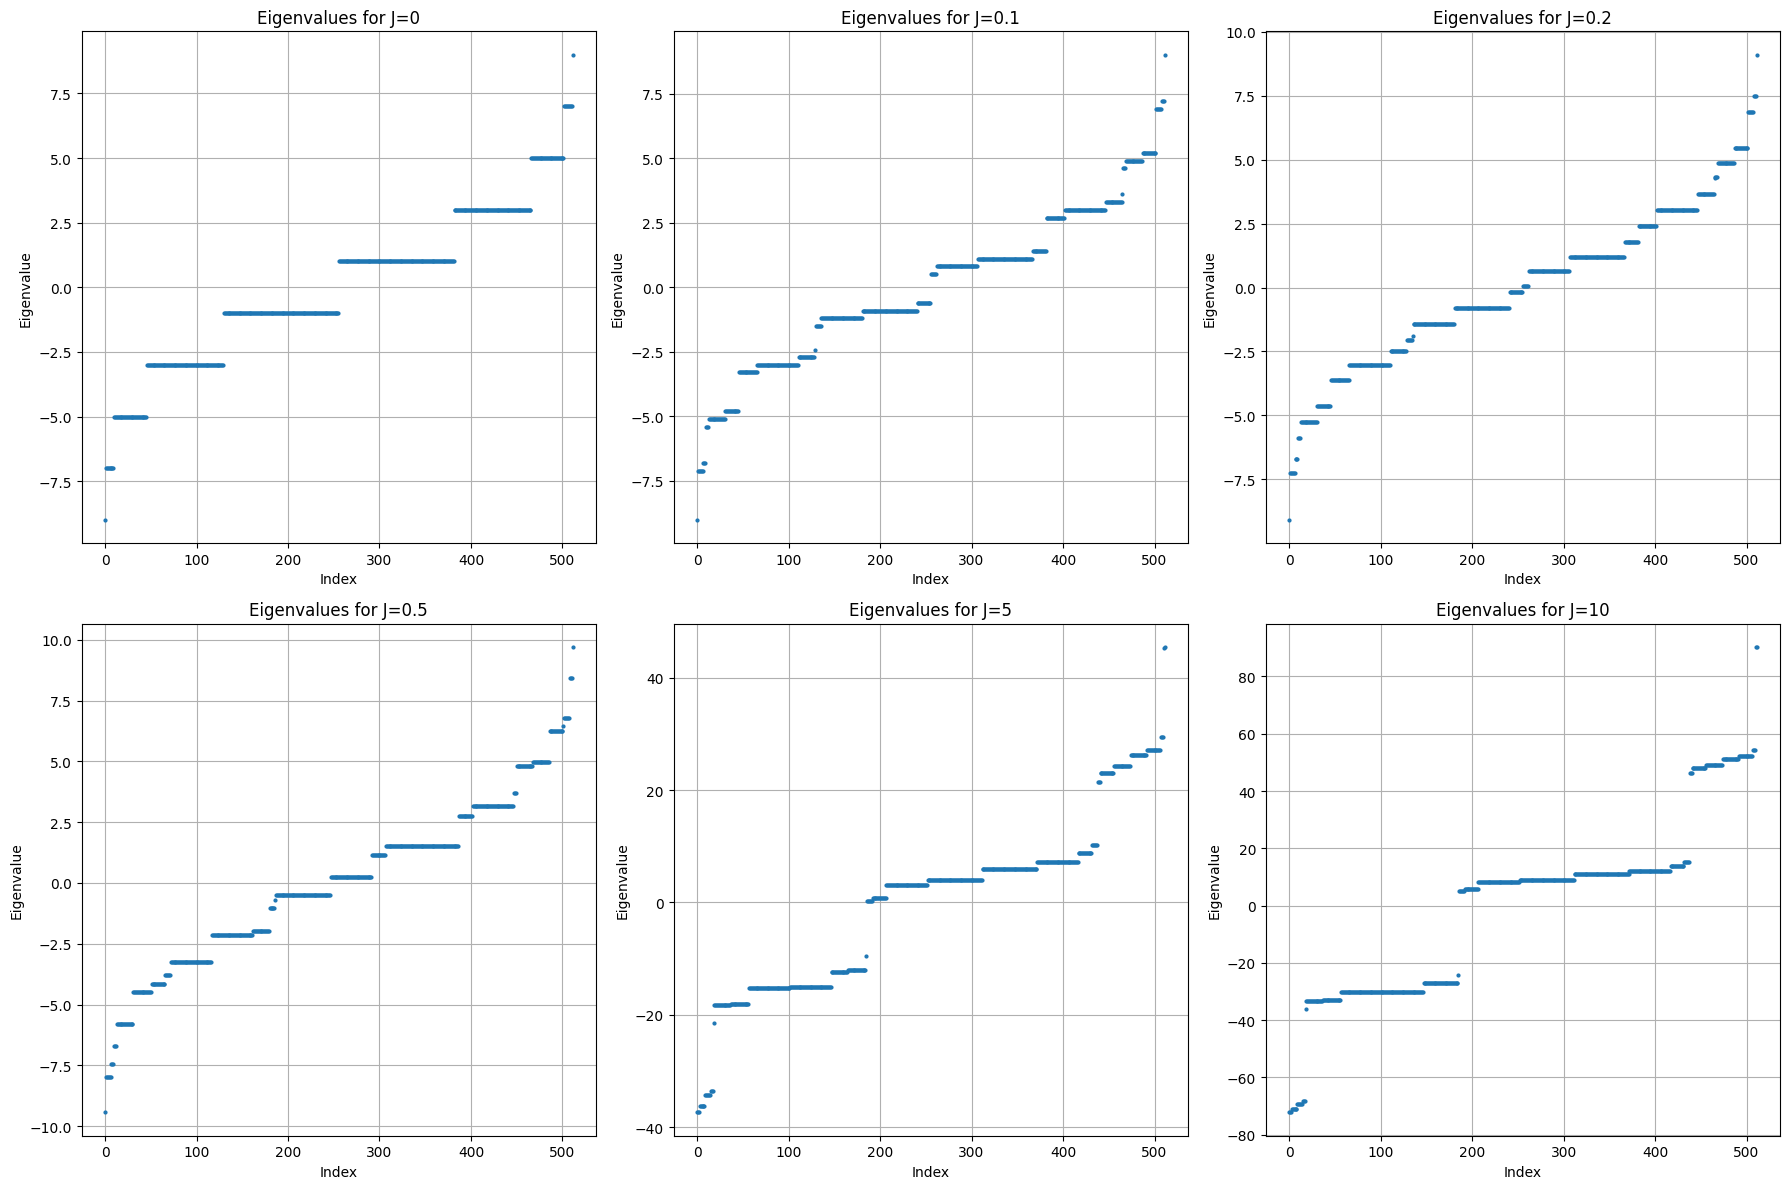

In [24]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each set of eigenvalues in a separate subplot
for i, ax in enumerate(axs):
    if i < len(eigen):
        ax.plot(eigen[i], 'o', markersize=2)
        ax.set_title(f'Eigenvalues for J={J[i]}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Eigenvalue')
        ax.grid(True)
    else:
        fig.delaxes(ax)  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

### OBC

#### L = 10

In [25]:
L = 10
J = [0, 0.1, 0.2, 0.5, 5, 10]

In [26]:
eigen = []

for j in J:
    h = functions.build_fullH(L,pbc=False,J=j)
    eigen.append(eigvalsh(h))

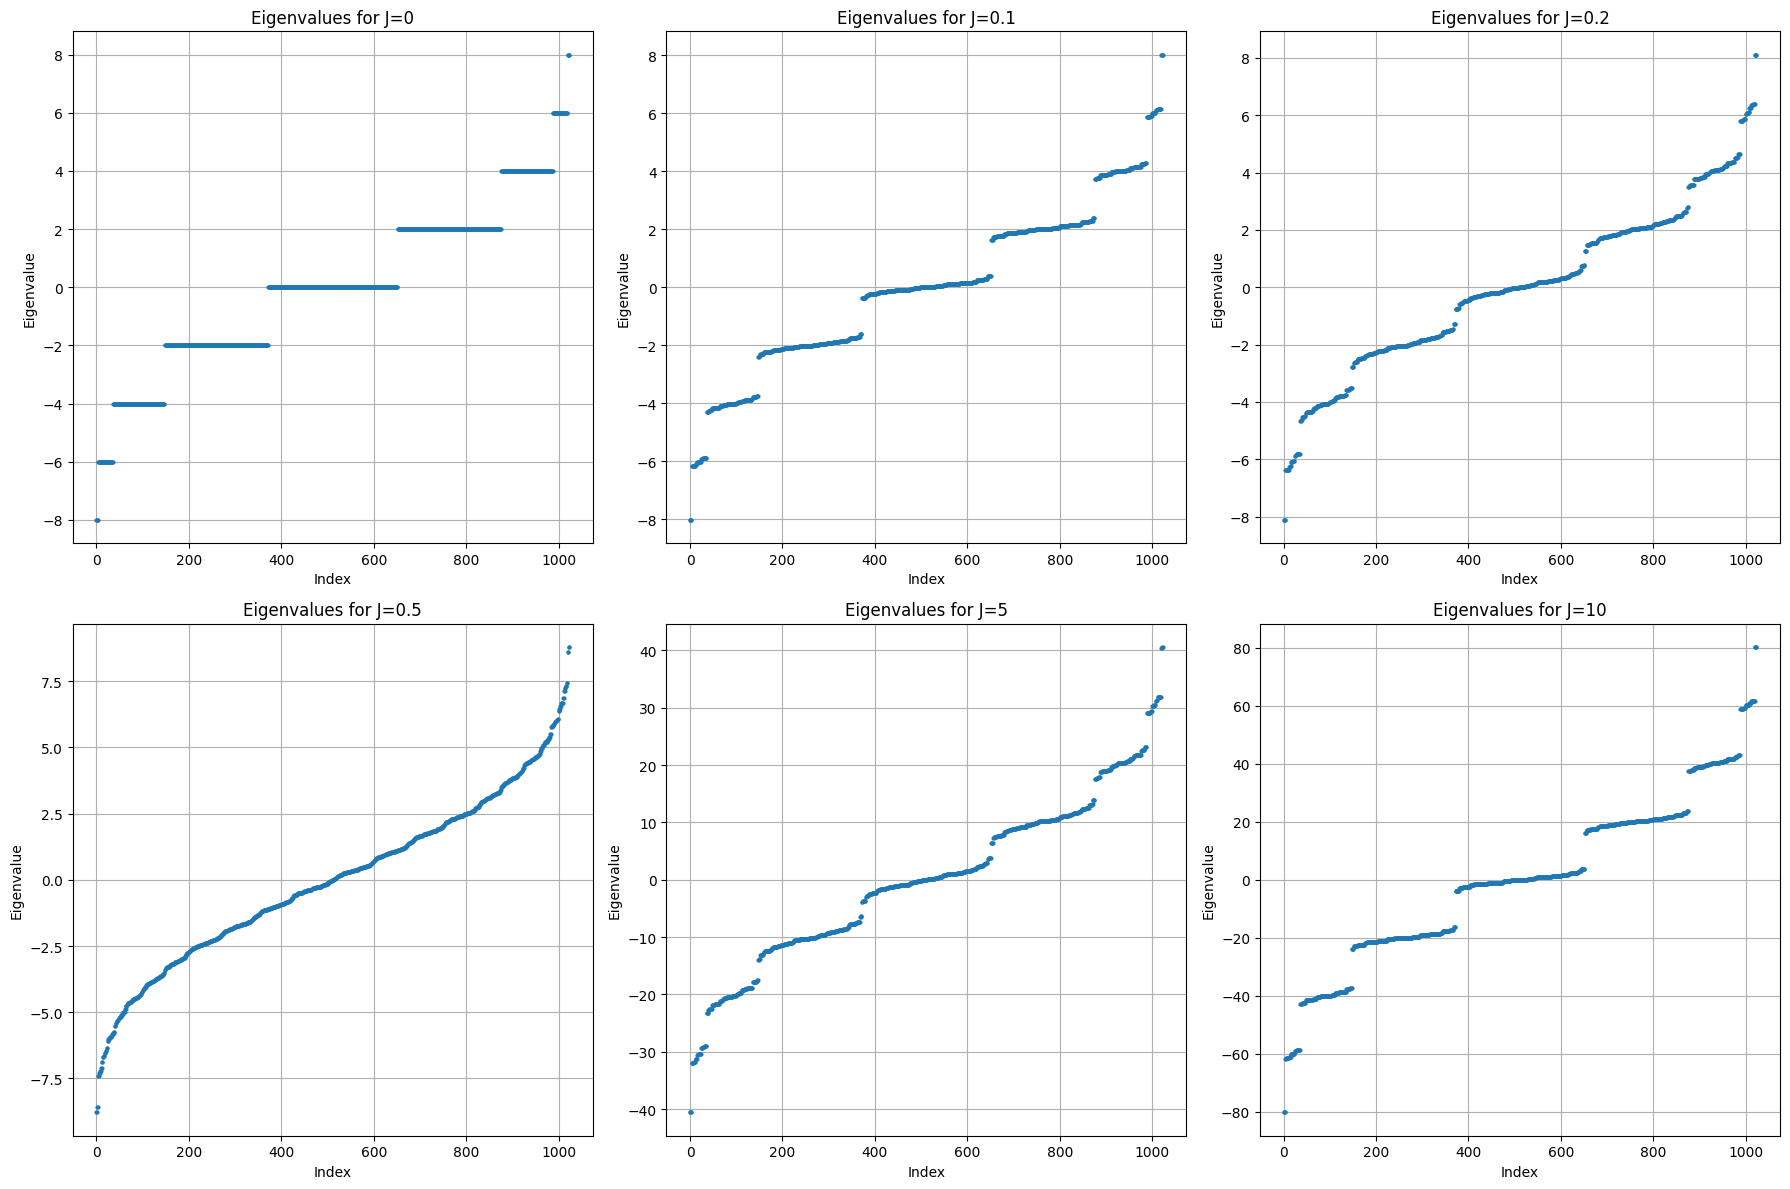

In [27]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each set of eigenvalues in a separate subplot
for i, ax in enumerate(axs):
    if i < len(eigen):
        ax.plot(eigen[i], 'o', markersize=2)
        ax.set_title(f'Eigenvalues for J={J[i]}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Eigenvalue')
        ax.grid(True)
    else:
        fig.delaxes(ax)  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

#### L = 9

In [28]:
L = 9

In [29]:
eigen = []

for j in J:
    h = functions.build_fullH(L,pbc=False,J=j)
    eigen.append(eigvalsh(h))

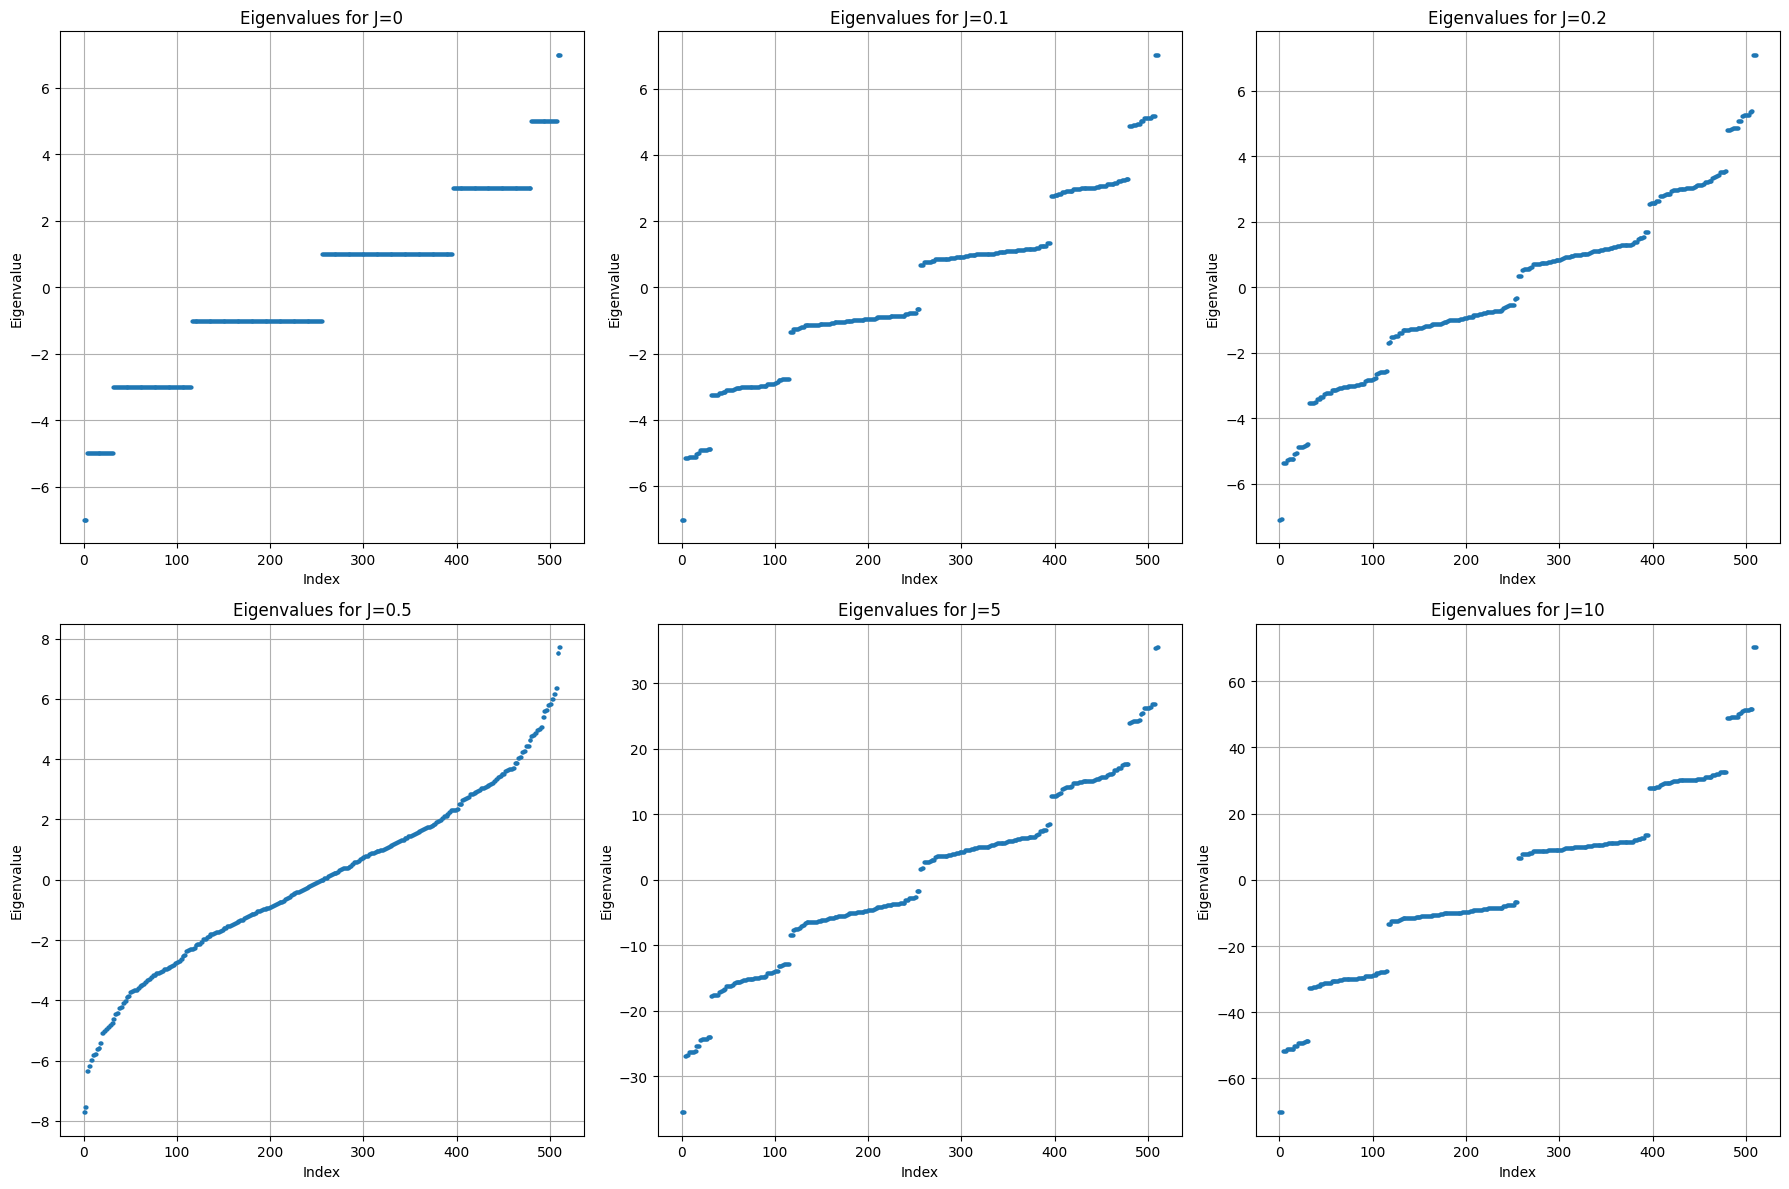

In [30]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each set of eigenvalues in a separate subplot
for i, ax in enumerate(axs):
    if i < len(eigen):
        ax.plot(eigen[i], 'o', markersize=2)
        ax.set_title(f'Eigenvalues for J={J[i]}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Eigenvalue')
        ax.grid(True)
    else:
        fig.delaxes(ax)  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

## Magnetization

In [2]:
L=10

In [3]:
def magnetization(L, psi):
    mag = 0
    for state,coeff in enumerate(psi):
        mag_i = 0
        for i in range(L):
            mag_i += (2 * (state & 2**i)/2**i - 1)
        #print(mag_i)
        mag += coeff**2 * mag_i
    return mag

In [4]:
X = np.linspace(0,np.pi,100)
magnetization_values = []

for x in X:
    h = functions.build_fullH(L, pbc=True, J=np.sin(x), K=np.cos(x))
    eigenvalues, eigenvectors = eigsh(h, k=1, which='SA')
    magnetization_values.append(magnetization(L, eigenvectors[:,0]))

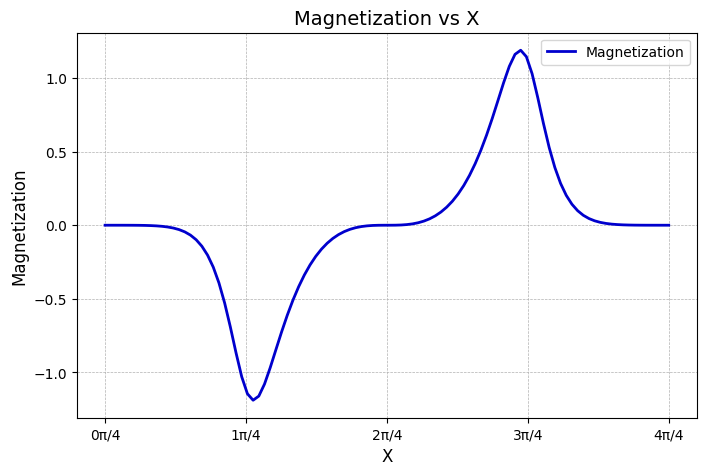

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(X, magnetization_values, label='Magnetization', color='mediumblue', linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('Magnetization', fontsize=12)
plt.title('Magnetization vs X', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=np.arange(0, np.pi + np.pi/4, np.pi/4), labels=[f'{i}π/4' for i in range(5)])
plt.legend()
plt.show()

## Energy Gap

### Large Matrix

In [20]:
L = 6
X = np.linspace(0, 3, 100)
gaps = []

for x in X:
    J = x 
    K = 1 

    h = fast.build_HK(L, 0, J=J, K=K)
    eigenvalues1 = eigsh(h, k=1, which='SA', return_eigenvectors=False)
    h = fast.build_HK(L, L/2, J=J, K=K)
    eigenvalues2 = eigsh(h, k=1, which='SA', return_eigenvectors=False)
    gaps.append(eigenvalues2[0] - eigenvalues1[0])

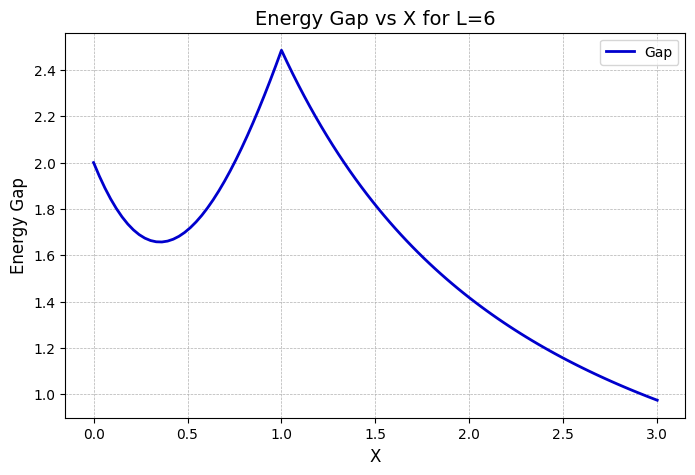

In [21]:
# Plotting the gap
plt.figure(figsize=(8, 5))
plt.plot(X, gaps, label='Gap', color='mediumblue', linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('Energy Gap', fontsize=12)
plt.title('Energy Gap vs X for L={}'.format(L), fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.xticks(ticks=np.arange(X.min(), X.min(), np.pi/4), labels=[f'{i}π/4' for i in range(2)])
plt.legend()
plt.show()

### Gap change in function of J and K

In [44]:
L=10
X = np.linspace(0,np.pi/2,20)
labels=[f'{i}π/4' for i in range(3)]

In [30]:
sizes = [4, 6, 8, 10, 12,14]  # Different even sizes
all_gaps = {}

for L in sizes:
    gaps = []
    for x in X:
        h = functions.build_fullH(L, pbc=True, J=np.sin(x), K=np.cos(x))
        eigenvalues, eigenvectors = eigsh(h, k=3, which='SA')
        gaps.append(eigenvalues[1] - eigenvalues[0])
    all_gaps[L] = gaps

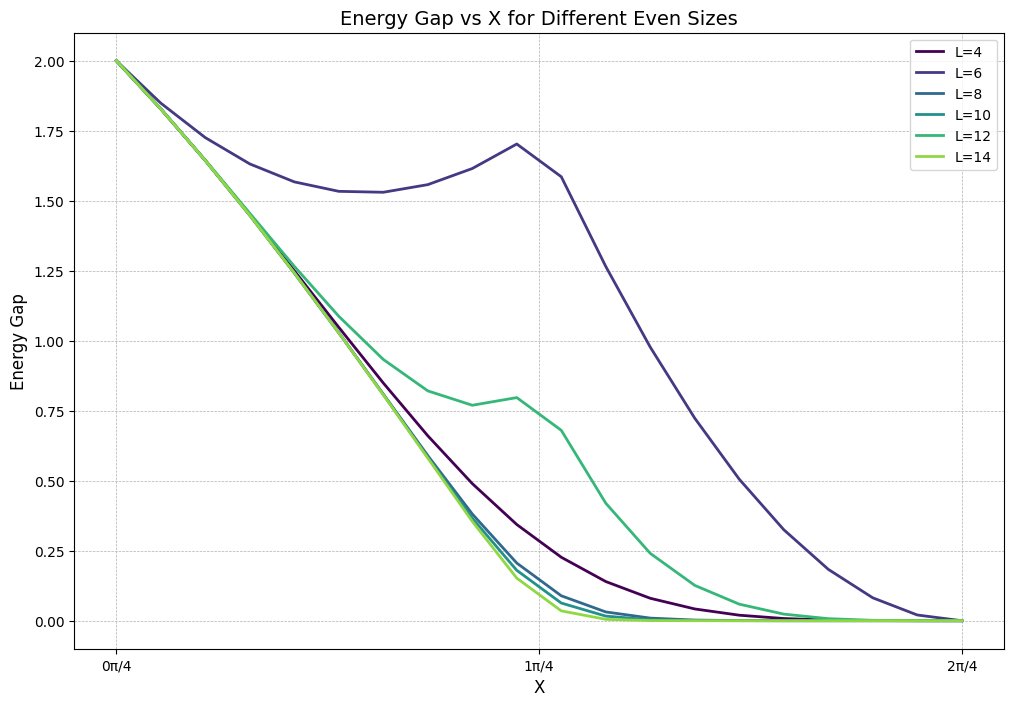

In [46]:
# Plotting the energy gaps for different sizes
plt.figure(figsize=(12, 8))

# Get a colormap
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(all_gaps) + 1))

for idx, (L, gaps) in enumerate(all_gaps.items()):
    plt.plot(X, gaps, label=f'L={L}', linewidth=2, color=colors[idx])

plt.xlabel('X', fontsize=12)
plt.ylabel('Energy Gap', fontsize=12)
plt.title('Energy Gap vs X for Different Even Sizes', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=np.arange(0, np.pi/2+0.1, np.pi/4), labels=labels)
plt.legend()
plt.show()

### Gap as a function of J

In [22]:
X = np.linspace(0,4,20)

In [25]:
sizes = [4, 6, 8, 10, 12, 14, 18]  # Different even sizes
all_gaps = {}

for L in sizes:
    gaps = []
    for x in X:
        J = x 
        K = 1 

        h = fast.build_HK(L, 0, J=J, K=K)
        eigenvalues1 = eigsh(h, k=1, which='SA', return_eigenvectors=False)
        h = fast.build_HK(L, L/2, J=J, K=K)
        eigenvalues2 = eigsh(h, k=1, which='SA', return_eigenvectors=False)
        gaps.append(eigenvalues2[0] - eigenvalues1[0])
    all_gaps[L] = gaps

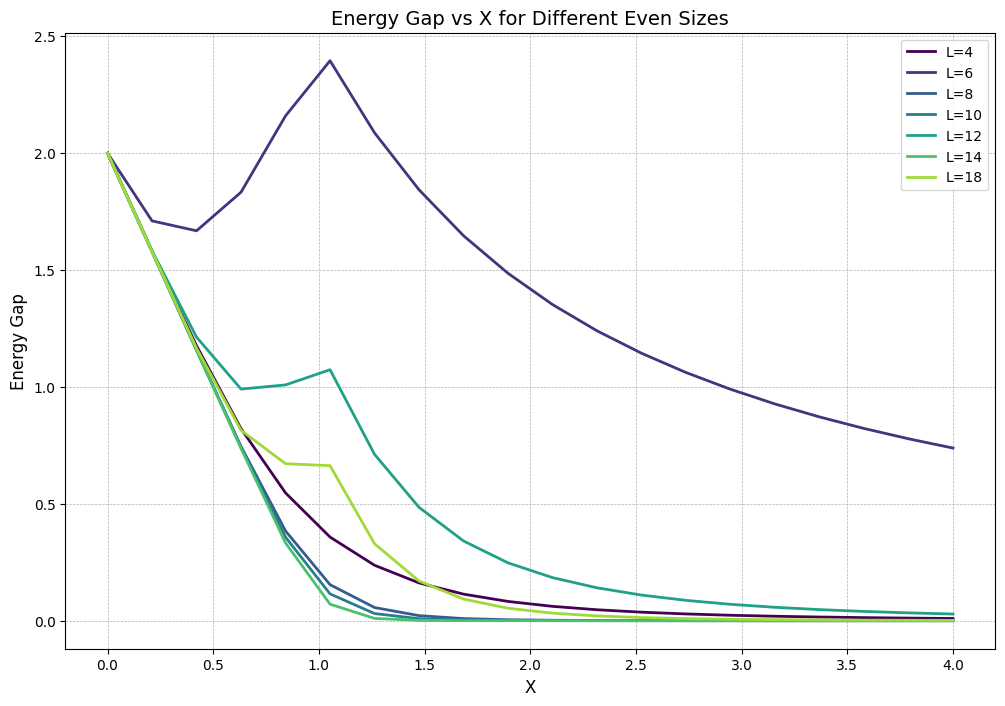

In [26]:
# Plotting the energy gaps for different sizes
plt.figure(figsize=(12, 8))

# Get a colormap
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(all_gaps) + 1))

for idx, (L, gaps) in enumerate(all_gaps.items()):
    plt.plot(X, gaps, label=f'L={L}', linewidth=2, color=colors[idx])

plt.xlabel('X', fontsize=12)
plt.ylabel('Energy Gap', fontsize=12)
plt.title('Energy Gap vs X for Different Even Sizes', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()